In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

In [55]:
G1 = nx.nx_agraph.read_dot('./Dataset/LesMiserables.dot/LesMiserables.dot')
edge_list =[]
for e in G1.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in G1.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

254
77


In [48]:
adjacency_list = {}
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
#     # for undirected graph, we also add the reverse edge
    if target not in adjacency_list:
        adjacency_list[target] = []
    adjacency_list[target].append(source)

In [54]:
# BFS Implementation
def bfs(graph, root):
    visited, queue = set(), deque([root])
    bfs_tree = {root: []}
    order_visited = [root]
    visited.add(root)  
    while queue:
        vertex = queue.popleft()
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                if neighbour not in bfs_tree:
                    bfs_tree[neighbour] = []  
                bfs_tree[vertex].append(neighbour)
                order_visited.append(neighbour)
    return bfs_tree, order_visited

# DFS Implementation
def dfs(graph, root, visited=None, order_visited=None, dfs_tree=None):
    if visited is None:
        visited = set()
    if order_visited is None:
        order_visited = []
    if dfs_tree is None:
        dfs_tree = {root: []}
    visited.add(root)
    order_visited.append(root)
    for neighbour in graph[root]:
        if neighbour not in visited:
            dfs_tree[root].append(neighbour)
            dfs_tree[neighbour] = []  
            dfs(graph, neighbour, visited, order_visited, dfs_tree)
    return dfs_tree, order_visited

# Layered Tree Layout
# def layered_tree_layout(tree, root):
#     levels = {root: 0}
#     visited = set()
#     def recurse(node, level):
#         visited.add(node)
#         for child in tree[node]:
#             if child not in visited:
#                 levels[child] = level + 1
#                 recurse(child, level + 1)
#     recurse(root, 0)
#     return levels

# def postorder_traversal(tree, root):
#     visited = set()
#     postorder = []
#     def recurse(node):
#         visited.add(node)
#         for child in tree[node]:
#             if child not in visited:
#                 recurse(child)
#         postorder.append(node)
#     recurse(root)
#     return postorder

def preorder_traversal(tree, root):
    visited = set()
    preorder = []
    def recurse(node):
        visited.add(node)
        preorder.append(node)
        for child in tree[node]:
            if child not in visited:
                recurse(child)
    recurse(root)
    return preorder

def layered_tree_layout(tree, root):
    levels = {root: 0}
    positions = {root: 0}
    widths = {node: 1 for node in tree.keys()}
    visited = set()

    for node in postorder_traversal(tree, root):
        for child in tree[node]:
            widths[node] += widths[child]

    for node in preorder_traversal(tree, root):
        visited.add(node)
        levels[node] = levels.get(node, 0)
        positions[node] = sum(widths[sibling] for sibling in tree[node] if sibling in visited)
        for child in tree[node]:
            if child not in visited:
                levels[child] = levels[node] + 1
                positions[child] = positions[node] + sum(widths[sibling] for sibling in tree[node] if sibling in visited)

    return levels, positions




# Time Complexity Analysis
start_time = time.time()
bfs_tree, bfs_order = bfs(adjacency_list, '1')
end_time = time.time()
print(f"BFS Time Complexity: {end_time - start_time}")

start_time = time.time()
dfs_tree, dfs_order = dfs(adjacency_list, '1')
end_time = time.time()
print(f"DFS Time Complexity: {end_time - start_time}")

# Apply to Les Misérables network
bfs_tree, bfs_order = bfs(adjacency_list, '1')
dfs_tree, dfs_order = dfs(adjacency_list, '1')

# Layered Tree Layout
bfs_layout = layered_tree_layout(bfs_tree, '1')
dfs_layout = layered_tree_layout(dfs_tree, '1')

print(f'\nBFS = {bfs_order}\n')
print(bfs_tree)
print(f"\nDFS = {dfs_order}\n")
print(dfs_tree)

print(f'\n{dfs_layout}')

BFS Time Complexity: 0.0
DFS Time Complexity: 0.0

BFS = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73', '17', '18', '19', '20', '21', '22', '23', '31', '42', '43', '51', '40', '41', '76', '55', '46', '58', '63', '47', '60', '61', '62', '64', '66', '67', '74', '75', '77', '57', '53', '54', '68', '48']

{'1': ['2'], '2': ['3', '4', '5', '6', '7', '8', '9', '10', '11'], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': ['12', '13', '14', '15', '16', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '44', '45', '49', '50', '52', '56', '59', '65', '69', '70', '71', '72', '73'], '12': [], '13': [], '14': [], '15': [], '16': [], '24': ['17', '18', '19', '20', '21', '22', '23', '31'], '25': ['42', '43', '51'], '26': ['40

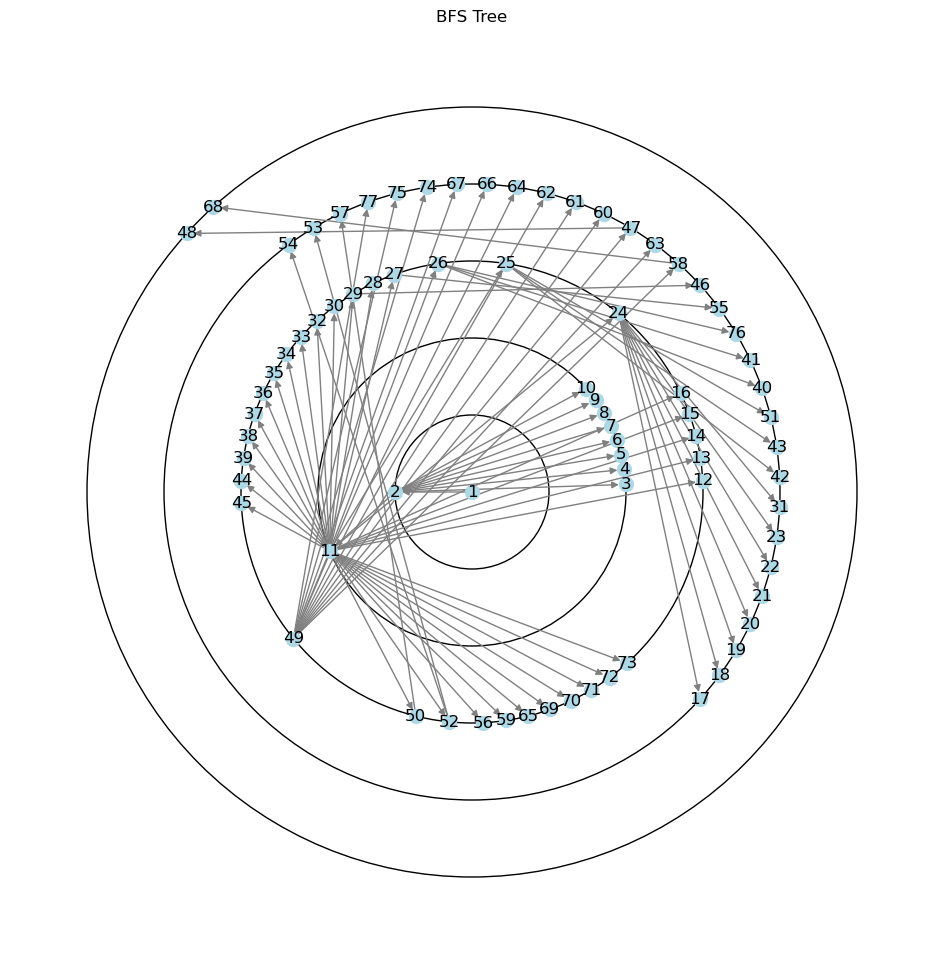

In [50]:
# def radial_positions(tree, root, bfs_layout, scale=1):
#     pos = {root: (0, 0)}  # root is at the center
#     for level in range(1, max(bfs_layout.values()) + 1):
#         nodes_at_level = [node for node, node_level in bfs_layout.items() if node_level == level]
#         for i, node in enumerate(nodes_at_level):
#             angle = 2 * math.pi * i / len(nodes_at_level)  
#             x = scale * level * math.cos(angle)
#             y = scale * level * math.sin(angle)
#             pos[node] = (x, y)
#     return pos

def compute_subtree_angles(node, tree, layout):
    if node not in tree or len(tree[node]) == 0:  # if the node is a leaf or not in the tree
        return 2 * math.pi / sum(1 for n in layout if n not in tree or len(tree[n]) == 0)
    else:
        total_angle = 0
        for child in tree[node]:
            child_angle = compute_subtree_angles(child, tree, layout)
            total_angle += child_angle
        return total_angle

def radial_positions(tree, root, layout, scale):
    pos = {root: (0, 0)}
    subtree_angles = {node: compute_subtree_angles(node, tree, layout) for node in layout}
    starting_angle = 0

    for level in range(1, max(layout.values()) + 1):
        nodes_at_level = [node for node, node_level in layout.items() if node_level == level]

        for node in nodes_at_level:
            angle = starting_angle + subtree_angles[node] / 2
            x = scale * level * math.cos(angle)
            y = scale * level * math.sin(angle)
            pos[node] = (x, y)
            starting_angle += subtree_angles[node]

    return pos

#defining the position of nodes
scale = 100
bfs_pos = radial_positions(bfs_tree, '1', bfs_layout[0], scale)

# Draw the BFS tree
plt.figure(figsize=(12, 12))

# max_level = round(max(bfs_pos.values(), key=lambda x: (x[0]**2 + x[1]**2)**0.5)[0])
max_level = max(bfs_layout[0].values())
radius = (max_level + 1) * scale

for level in range(max_level + 1):
    circle = plt.Circle((0, 0), level * scale, color='black', fill=False)
    plt.gca().add_patch(circle)

bfs_tree_graph = nx.DiGraph(bfs_tree)
nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=100, node_color='lightblue', edge_color='gray')

plt.title('BFS Tree')
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


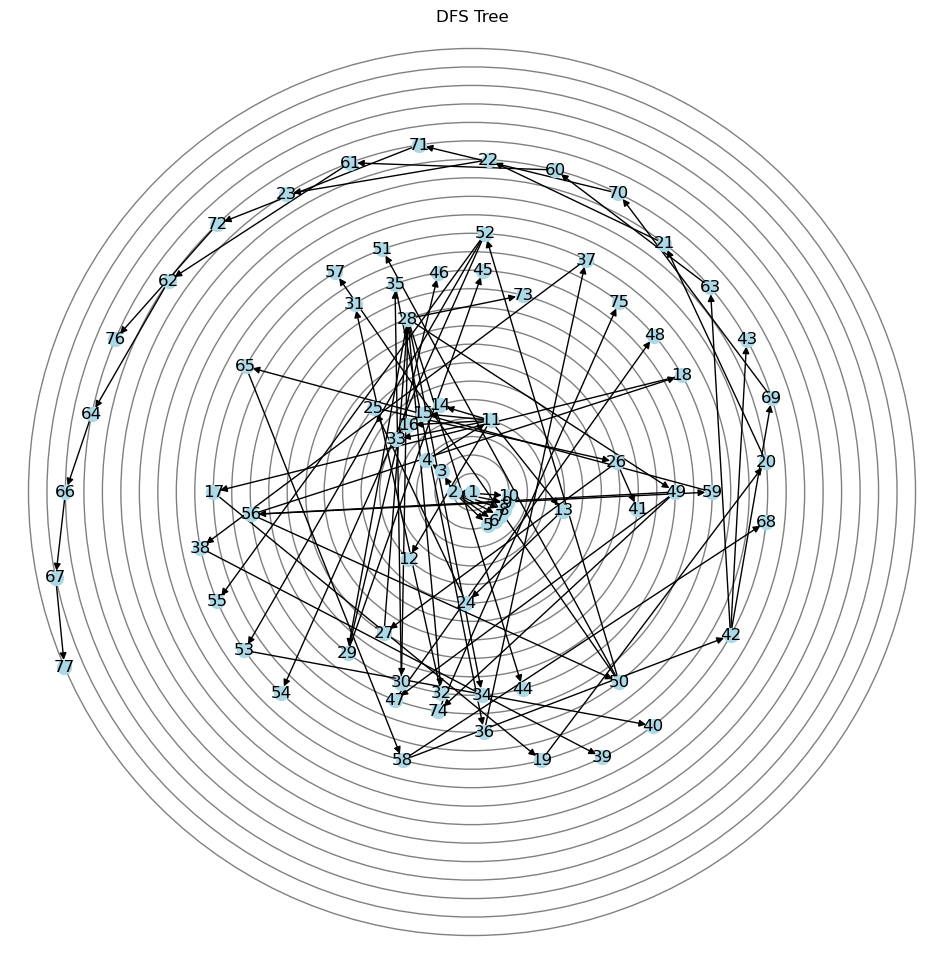

In [51]:
dfs_tree_graph = nx.DiGraph(dfs_tree)

dfs_layout = layered_tree_layout(dfs_tree, '1')
scale = 100 
dfs_pos = radial_positions(dfs_tree, '1', dfs_layout[0], scale)

plt.figure(figsize=(12, 12))

# max_level = round(max(dfs_pos.values(), key=lambda x: (x[0]**2 + x[1]**2)**0.5)[0])
max_level = max(dfs_layout[0].values())  
radius = (max_level + 1) * scale

for level in range(max_level + 1):
    circle = plt.Circle((0, 0), level * scale, color='gray', fill=False)
    plt.gca().add_patch(circle)

dfs_tree_graph = nx.DiGraph(dfs_tree)
nx.draw(dfs_tree_graph, dfs_pos, with_labels=True, node_size=100, node_color='lightblue', edge_color='black')

plt.title('DFS Tree')
plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

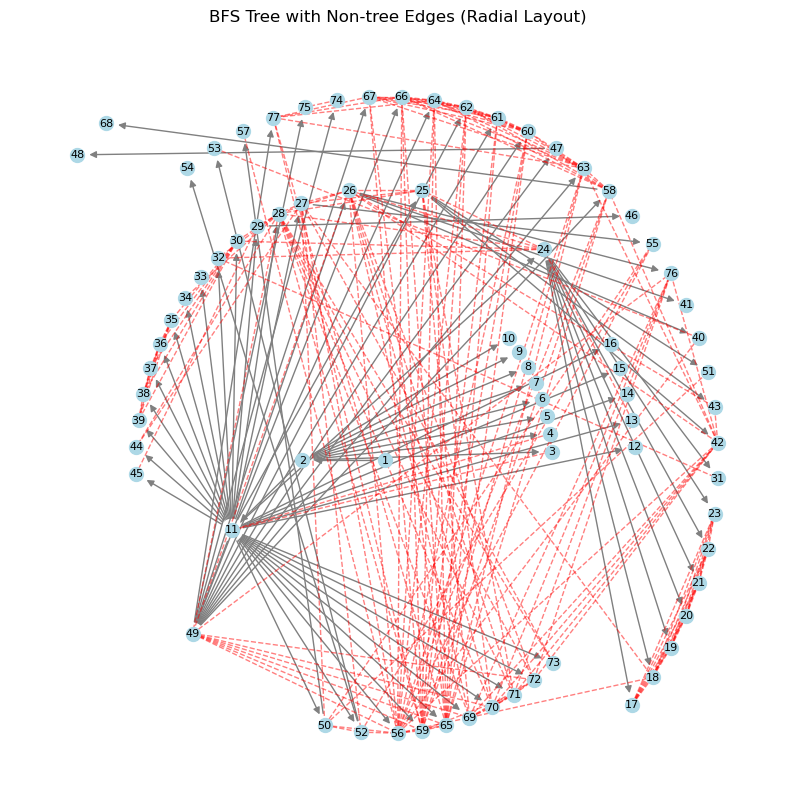

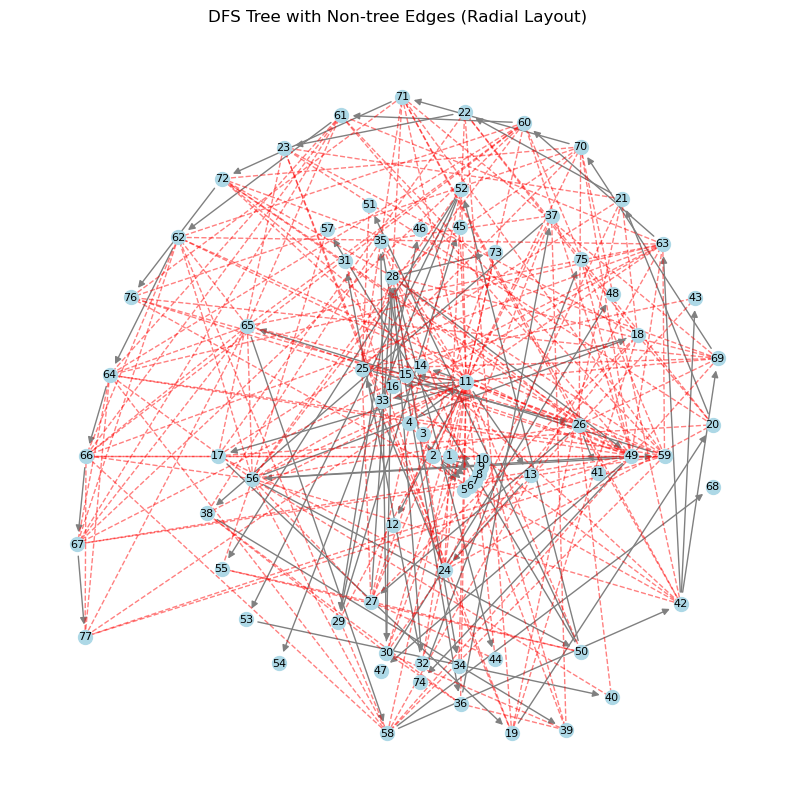

In [57]:
# def radial_positions_for_all(graph, tree, root, layout, scale=1):
#     # Start with radial positions for the tree
#     pos = radial_positions(tree, root, layout, scale=scale)
    
#     # Calculate the maximum level used in the radial layout
#     max_level = max(layout.values())
    
#     # Ensure all nodes have a position (for isolated nodes not in the tree)
#     for node in graph.nodes():
#         if node not in pos:
#             pos[node] = (0, 0)  # Assign a default position, or place them on an outer circle
    
#     # Adjust positions of nodes not in the tree
#     non_tree_nodes = [n for n in graph.nodes() if n not in pos]
#     if non_tree_nodes:  # Check if non_tree_nodes is not empty to avoid ZeroDivisionError
#         angle_step = 2 * math.pi / len(non_tree_nodes)
#         for i, node in enumerate(non_tree_nodes):
#             angle = i * angle_step
#             x = (max_level + 1) * scale * math.cos(angle)  # Place outside the tree
#             y = (max_level + 1) * scale * math.sin(angle)
#             pos[node] = (x, y)
    
#     return pos


def radial_positions_for_all(graph, tree, root, layout, scale):
    # First calculate radial positions for the nodes in the tree
    pos = radial_positions(tree, root, layout, scale)

    # Find the maximum level used in the radial layout
    max_level = max(layout.values())

    # Position the nodes not in the tree but connected to it
    connected_non_tree_nodes = [n for n in graph.nodes() if n not in pos and graph.has_edge(n, root)]
    for node in connected_non_tree_nodes:
        connected_nodes = list(nx.all_neighbors(graph, node))
        avg_angle = sum(math.atan2(pos[neigh][1], pos[neigh][0]) for neigh in connected_nodes) / len(connected_nodes)
        r = (max_level + 2) * scale  # Position them just outside the last tree level
        pos[node] = (r * math.cos(avg_angle), r * math.sin(avg_angle))

    # For isolated nodes, position them on an outer circle
    isolated_nodes = [n for n in graph.nodes() if n not in pos and not graph.has_edge(n, root)]
    if isolated_nodes:  # Check if isolated_nodes is not empty
        angle_step = 2 * math.pi / len(isolated_nodes)
        for i, node in enumerate(isolated_nodes):
            angle = i * angle_step
            r = (max_level + 3) * scale  # Position them further out than the connected non-tree nodes
            pos[node] = (r * math.cos(angle), r * math.sin(angle))

    return pos


scale =100
# Calculate
bfs_all_pos = radial_positions_for_all(G1, bfs_tree_graph, '1', bfs_layout[0], scale)
dfs_all_pos = radial_positions_for_all(G1, dfs_tree_graph, '1', dfs_layout[0], scale)

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G1, bfs_all_pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G1, bfs_all_pos, font_size=8)
nx.draw_networkx_edges(bfs_tree_graph, bfs_all_pos, edgelist=bfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, bfs_all_pos, edgelist=non_tree_edges_bfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('BFS Tree with Non-tree Edges (Radial Layout)')
plt.axis('off') # Turn off the axis
plt.show()

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G1, dfs_all_pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G1, dfs_all_pos, font_size=8)
nx.draw_networkx_edges(dfs_tree_graph, dfs_all_pos, edgelist=dfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, dfs_all_pos, edgelist=non_tree_edges_dfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('DFS Tree with Non-tree Edges (Radial Layout)')
plt.axis('off') # Turn off the axis
plt.show()

In [7]:
def bfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {root: (0, 0)}
    for level in range(1, max(levels.values()) + 1):
        nodes_at_level = [node for node, node_level in levels.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            pos[node] = (i - len(nodes_at_level) / 2, -level)  # distribute nodes evenly across the x-axis
    return pos

def dfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {root: (0, 0)}
    for level in range(1, max(levels.values()) + 1):
        nodes_at_level = [node for node, node_level in levels.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            pos[node] = (i - len(nodes_at_level) / 2, -level)  # distribute nodes evenly across the x-axis
    return pos


bfs_pos = bfs_positions(bfs_tree, '1')
dfs_pos = dfs_positions(dfs_tree, '1')

bfs_tree_graph = nx.DiGraph(bfs_tree)
dfs_tree_graph = nx.DiGraph(dfs_tree)

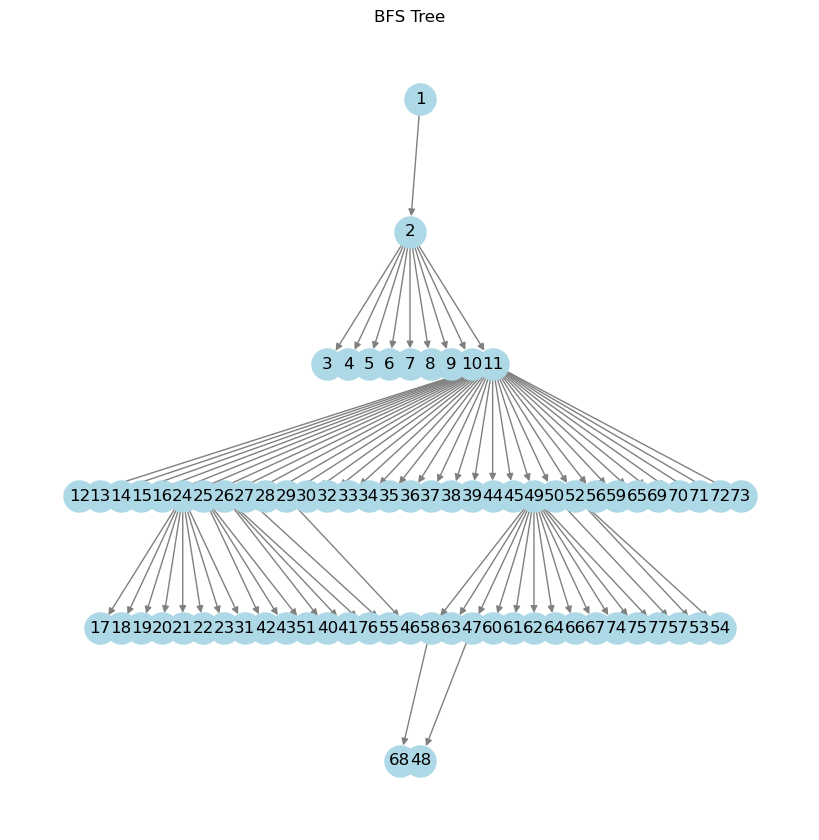

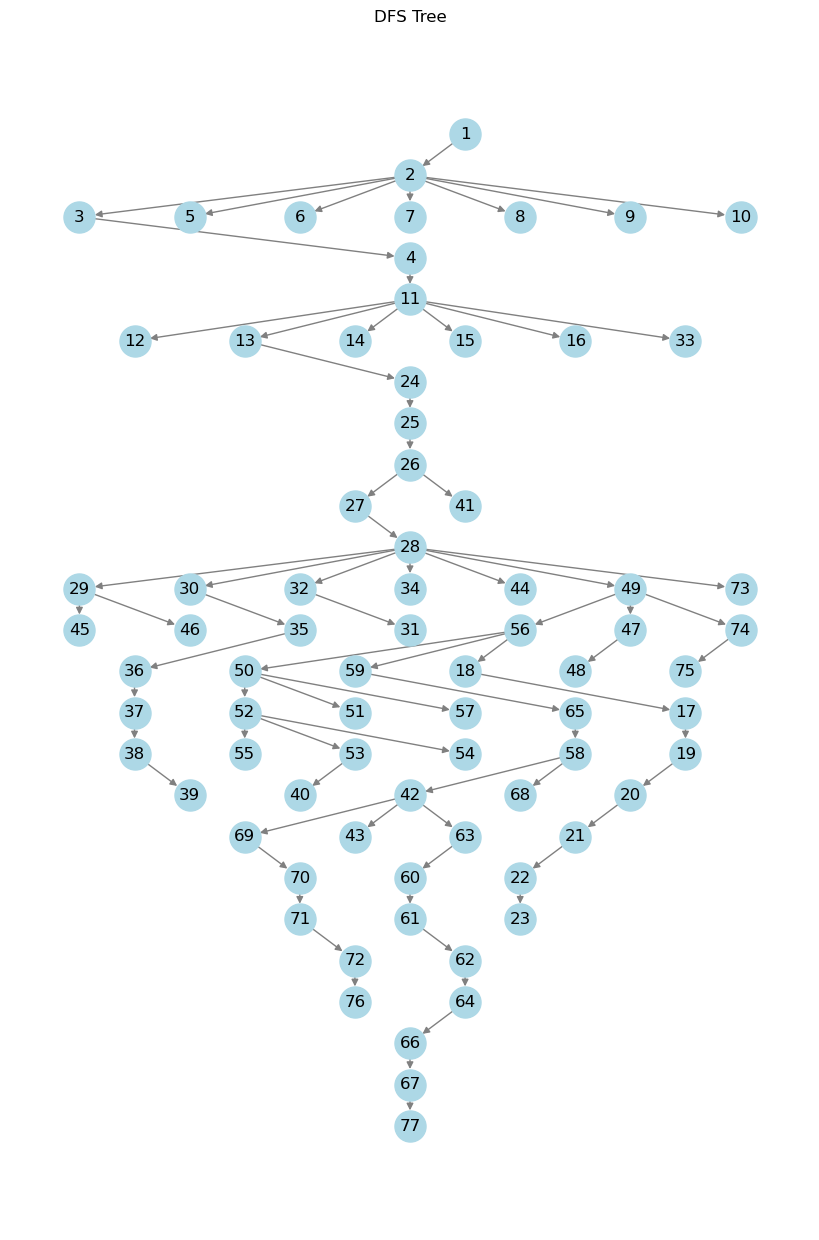

In [8]:
# Draw the BFS tree
plt.figure(figsize=(8, 8))
nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(bfs_tree_graph, 'label') 
nx.draw_networkx_labels(bfs_tree_graph, bfs_pos, labels=labels)
plt.title('BFS Tree')
plt.show()

# Draw the DFS tree
plt.figure(figsize=(8, 12))
nx.draw(dfs_tree_graph, dfs_pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(dfs_tree_graph, 'label') 
nx.draw_networkx_labels(dfs_tree_graph, dfs_pos, labels=labels)
plt.title('DFS Tree')
plt.show()


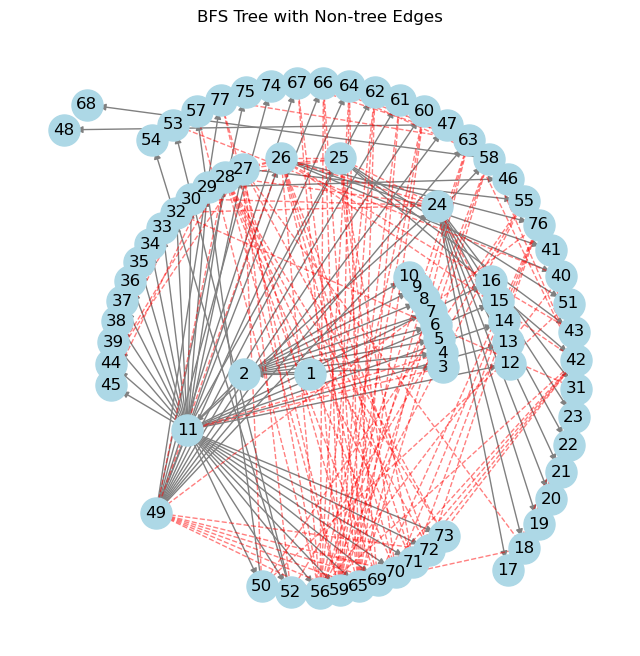

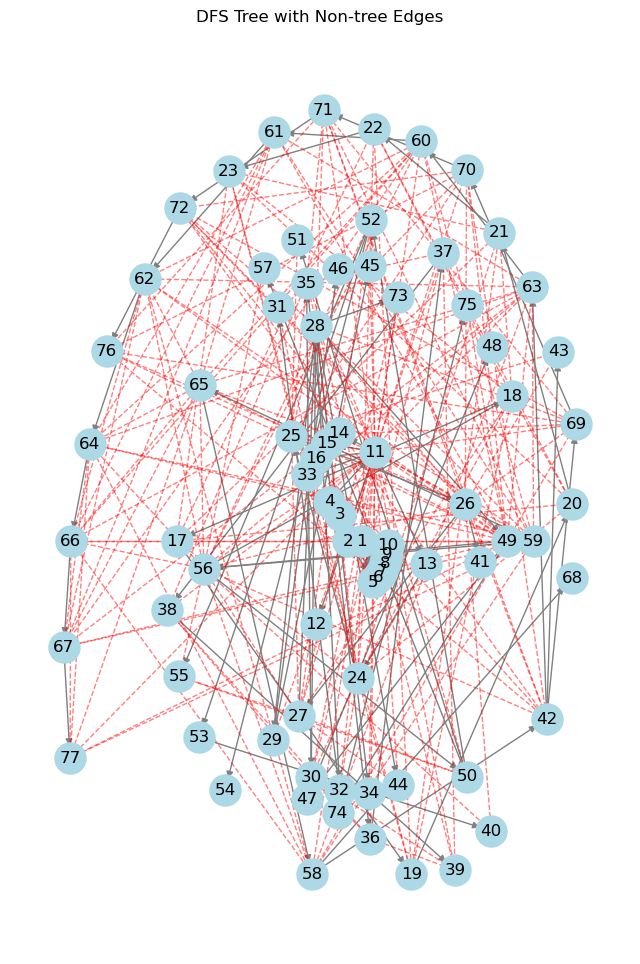

In [56]:
# Assuming bfs_tree_graph and dfs_tree_graph are NetworkX DiGraphs of the BFS and DFS trees respectively

# Define non_tree_edges for BFS
bfs_tree_edges = set(bfs_tree_graph.edges())
non_tree_edges_bfs = [(u, v) for u, v in G1.edges() if (u, v) not in bfs_tree_edges and (v, u) not in bfs_tree_edges]

# Define non_tree_edges for DFS
dfs_tree_edges = set(dfs_tree_graph.edges())
non_tree_edges_dfs = [(u, v) for u, v in G1.edges() if (u, v) not in dfs_tree_edges and (v, u) not in dfs_tree_edges]

# Now we can draw the BFS and DFS trees with non-tree edges
# Draw the BFS tree with non-tree edges
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(bfs_tree_graph, bfs_pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(bfs_tree_graph, bfs_pos)
nx.draw_networkx_edges(bfs_tree_graph, bfs_pos, edgelist=bfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, bfs_pos, edgelist=non_tree_edges_bfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('BFS Tree with Non-tree Edges')
plt.axis('off')  # Turn off the axis
plt.show()

# Draw the DFS tree with non-tree edges
plt.figure(figsize=(8, 12))
nx.draw_networkx_nodes(dfs_tree_graph, dfs_pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(dfs_tree_graph, dfs_pos)
nx.draw_networkx_edges(dfs_tree_graph, dfs_pos, edgelist=dfs_tree_edges, edge_color='gray')
nx.draw_networkx_edges(G1, dfs_pos, edgelist=non_tree_edges_dfs, edge_color='red', style='dashed', alpha=0.5)
plt.title('DFS Tree with Non-tree Edges')
plt.axis('off')  # Turn off the axis
plt.show()



DFS Tree with Root 1:
{'1': ['2'], '2': ['3', '5', '6', '7', '8', '9', '10'], '3': ['4'], '4': ['11'], '11': ['12', '13', '14', '15', '16', '33'], '12': [], '13': ['24'], '24': ['25'], '25': ['26'], '26': ['27', '41'], '27': ['28'], '28': ['29', '30', '32', '34', '44', '49', '73'], '29': ['45', '46'], '45': [], '46': [], '30': ['35'], '35': ['36'], '36': ['37'], '37': ['38'], '38': ['39'], '39': [], '32': ['31'], '31': [], '34': [], '44': [], '49': ['56', '47', '74'], '56': ['50', '59', '18'], '50': ['52', '51', '57'], '52': ['55', '53', '54'], '55': [], '53': ['40'], '40': [], '54': [], '51': [], '57': [], '59': ['65'], '65': ['58'], '58': ['42', '68'], '42': ['69', '43', '63'], '69': ['70'], '70': ['71'], '71': ['72'], '72': ['76'], '76': [], '43': [], '63': ['60'], '60': ['61'], '61': ['62'], '62': ['64'], '64': ['66'], '66': ['67'], '67': ['77'], '77': [], '68': [], '18': ['17'], '17': ['19'], '19': ['20'], '20': ['21'], '21': ['22'], '22': ['23'], '23': [], '47': ['48'], '48': []

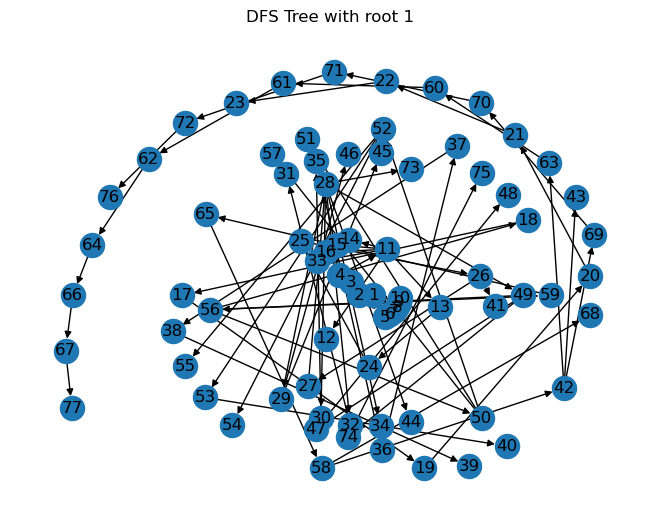

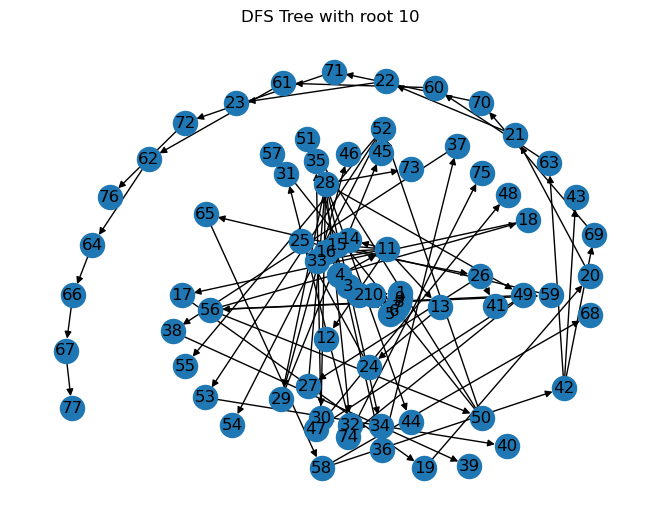

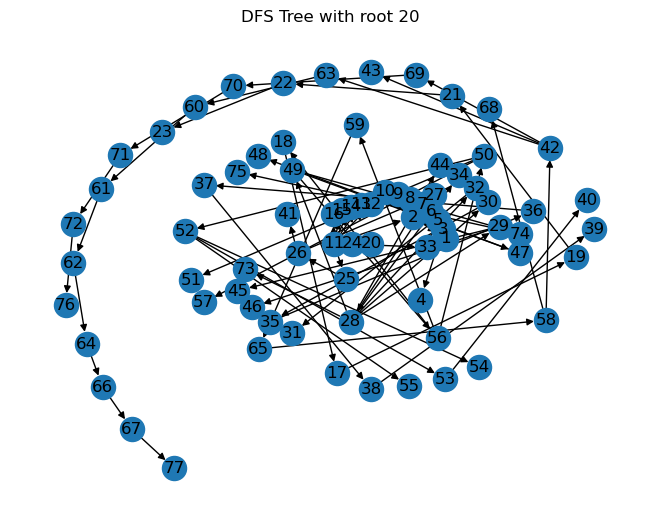

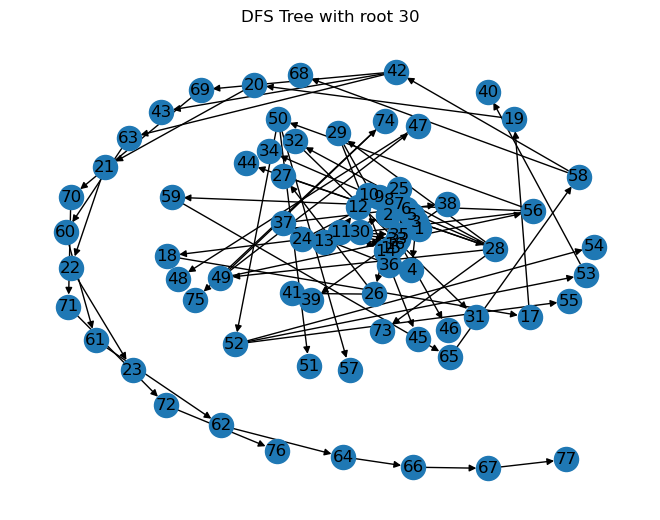

In [60]:

roots = ['1', '10', '20', '30']  # Example root nodes
for root in roots:
    dfs_tree, _ = dfs(adjacency_list, root)
    print(f"\nDFS Tree with Root {root}:")
    print(dfs_tree)
scale = 100
# Code for generating multiple DFS spanning trees with different roots
roots = ['1', '10', '20', '30']  # example root nodes
for root in roots:
    dfs_tree, dfs_order = dfs(adjacency_list, root)
    dfs_layout = layered_tree_layout(dfs_tree, root)
    dfs_pos = radial_positions(dfs_tree, root, dfs_layout[0], scale)
    plt.figure()
    nx.draw(nx.DiGraph(dfs_tree), dfs_pos, with_labels=True)
    plt.title(f'DFS Tree with root {root}')
    plt.show()